In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import datetime

import PIL
from tkinter import *
from PIL import Image, ImageTk
import pandas as pd
from tkinter.ttk import Frame,Style
from tkinter.filedialog import asksaveasfilename
from tkinter.filedialog import askopenfilename
import CuttingLine as CL

In [ ]:
from pylibdmtx import pylibdmtx

## 擷取template特徵

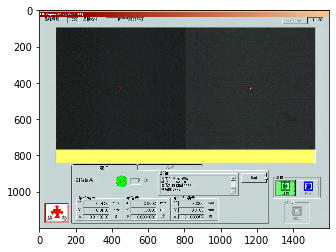

In [167]:
import matplotlib.pyplot as plt
##########規定用[\\]當路徑##############
output_path='C:\\Users\\Jacky\\Desktop\\find_cut\\screen\\'
#output_path='C:\\Users\\2102048\\pythonCV\\find_cut\\screen\\'
#image=cv2.imread(temp)
plt.imshow(image)
cv2.imwrite(output_path +'Target_'+'.jpg', image)
plt.show()
#顯示1717AS04

## 測試動態取顏色

In [77]:
import cv2
import matplotlib.pyplot as plt

def get_RGB(img,x,y):
    #img=cv2.imread(file)
    (B,G,R)=cv2.split(img)
    b,g,r=B[y,x],G[y,x],R[y,x]
    #cv2.ellipse(img,(x,y),(15,15),0,0,360,(0,0,255),3)
    
#     cv2.imshow('img',img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    return r,g,b
#get_RGB('C:\\Users\\2102048\\Downloads\\template\\og\\Target_8.jpg',300,300)

## 解碼

In [ ]:
#要在新電腦才能執行
from pylibdmtx import pylibdmtx
#將frame讀進來辨識，在回傳id結果
def decode_id(image):
    #im=img.imread(path)
    plt.imshow(im,cmap='gray')
    plt.title("title")
    plt.show
    #解碼程式
    all_barcode_info=pylibdmtx.decode(im,timeout=500,max_count=1)
    if len(all_barcode_info)!=0:
        return (all_barcode_info[0].data.decode("utf-8"))
    else:
        return 0

## 結合ID測試

In [6]:
def capture(video_frame):
    temp_list=[] #inintal array
    #一個frame進來，比對所有template
    for temp in template_paths:
        ######new，使用多個temp####
        temp_list.append(temp)
        ##########################
        print("============{}=============".format(temp))
        image = video_frame

        img_rgb = image

        img_gray = cv2. cvtColor (img_rgb, cv2. COLOR_BGR2GRAY)


        #讀取temp特徵
        template = cv2. imread(temp,0)

        w, h = template. shape[ ::-1 ]

        print('w:{}\nh:{}'.format(w,h))

        res = cv2. matchTemplate(img_gray ,template,cv2.TM_CCOEFF_NORMED)

        threshold = value

        loc = np.where(res >=threshold)

        if np.asarray(loc[0]).size!=0: #if have object,plt image；loc tuple transfer to array
            ########讀取機台色階#######
            r,g,b=get_RGB(video_frame,300,300)
            print("R:{} G:{} B:{}".format(r,g,b))
            ########讀取機台色階#######

            x=104 #截圖左上角 x座標

            y=107  #截圖左上角 y座標

            plt.imshow (img_rgb)

            plt.title('Raw_Image')

#               cv2.imwrite(output_path +'Screen_'+name+'.jpg', img_rgb)

            plt.show()

            #cut object from raw image

            #初始點上面X,Y已經設定好了
            #修改截圖出來的長寬H、W
            #注意螢幕輸入大小，右下點(1510,751)
            crop_img = img_rgb[y:751,x:1510]
            #crop_img = img_rgb[y:y+h,x:x+w]

            ss=datetime.datetime.now().strftime('%Y-%m-%d %H%M%S.%f')

            plt.title('Target_Image')

            #############new，不同template存不同資料夾################
            #判斷檔名跟當前迴圈的template
            if temp == temp_list[0]:
                print("=================File One==================")
                cv2.imwrite(output_path1+'Target_'+ss+'.jpg',crop_img)

            elif temp == temp_list[1]:
                print("=================File Two==================")
                cv2.imwrite(output_path2+'Target_'+ss+'.jpg',crop_img)
            #############new，不同template存不同資料夾################
            plt.imshow(crop_img)

            plt.show()

In [8]:
start_time=time.time()
#cut frame，楨數
time_F =10 
#以下global變數，要給capture()使用，要變更連裡面也要改
#注意在這個程式檔案，不能有其他重複的global變數相互存取
global value,Target,output_path1,output_path2,template_paths
value=0.6
#input_path   = './video/2021-05-20 08-56-30_7HAA.mp4'
#output_path  = './predict/'
#改成one、two分開

Target= './template/'
output_path1='C:/Users/Jacky/Desktop/find_cut/screen/one/'
output_path2='C:/Users/Jacky/Desktop/find_cut/screen/two/'

# Read template folder

template_paths = []
if os.path.isdir(Target):
    for inp_file in os.listdir(Target):
        template_paths += [Target + inp_file]
else:
    template_paths += [Target]
    
#搜template_paths中符合條件的jpg在存入原本當中
template_paths = [inp_file for inp_file in template_paths if (inp_file[-4:] in ['.jpg', '.png', '.JPG','jpeg'])]

 


camera_port = 1
camera = cv2.VideoCapture(camera_port)
vc=cv2.VideoCapture(camera_port, cv2.CAP_DSHOW)

#調整解析度
vc.set(cv2.CAP_PROP_FRAME_WIDTH, 1600)
vc.set(cv2.CAP_PROP_FRAME_HEIGHT, 1200)
 

if vc.isOpened():#判斷是否開啟影片

    rval, video_frame = vc.read()

    print('Start....')

else:

    rval=False 

c=0
#控制讀取id開關
ID_switch=True
##開始擷取串流
#要寫控制串流停止
while rval:#擷取影像至結束

    rval,video_frame = vc.read()
    #多template路徑
    if(c % time_F == 0): #每隔幾幀進行擷取
        #一直循環直到有讀到ID
        ####################################
        while ID_switch:
            #將串流的影像辨識出ID
            ID=decode_id(video_frame)
            if ID ==0:
                print(start_time)
                break
            else:
                print("=========================")
                print(ID)
                #有讀到ID，把開關關閉
                ID_switch=False
                break
        #####################################
    #有讀取到ID時為False，才能執行下面
    elif ID_switch==False:
        #以tempplate擷取特徵
        capture(video_frame)
    else:
        continue

    c=c+1       

end_time=time.time()

print('END')

print('Time:',end_time-start_time)
camera.release()

END
Time: 0.23466014862060547


## GUI使用 function

In [3]:
#Read image file

def x_ray_function():
    path='C:\\Users\\2102048\\pythonCV\\'
    #測試
    CL.test_function()
    #過濾
    CL.use_find_CuttingLine(path+'find_cut\\screen\\',path+'find_cut\\ctemp')
    text2.insert("insert", "=========預處理ok========\n")
    time.sleep(1)
    #分邊
    CL.precutting(path+'find_cut\\ctemp\\',path+'find_cut\\cuttemp\\')
    text2.insert("insert", "=========分割ok========\n")
    time.sleep(1)
    #計算
    global real_table,ID
    real_table=CL.x_ray_cutting(path+'find_cut\\cuttemp\\',path+'find_cut\\cutresult\\')
    print(ID)
    #存成csv
    if len(ID)>0:
        real_table.to_csv(path+'find_cut\\cutresult\\'+ID+'.csv')
        text2.insert("insert", "========量測精度ok========\n")
    else:
        text2.insert("insert", "========量測精度異常========\n")

def newFile():
    text.delete("1.0",END)
    root.title("Untitled")
def openFile():
    global filename
    filename=askopenfilename()
    #指定檔名給label顯示
    panel_msg.set(filename.split('/')[-1])
    if filename=="":
        return
    with open(filename,"r")as fileObj:
        content=fileObj.read()
    text.delete("1.0",END)
    text.insert(END,content)
    root.title(filename)
def saveAsFile():
    global filename
    textContent=text .get("1.0",END)
    #開啟對話視窗
    filename=asksaveasfilename(defaultextension=".csv")
    if filename=="":
        return
    with open(filename,"w") as output:
        output.write(textContent)
        
def control_status():
    if btn_process==True:
        status="Process..."
    elif btn_end==True:
        status="End"
    else:
        status="Standby..."
#倒數
def run_counter(digit):
    global run_tk
    run_tk=True
    print_log()
    def counting():
        global counter,process_counter
        counter+=1
        #給log使用
        process_counter+=1
        digit.config(text=str(counter))
        digit.after(1000,counting)
    counting()
#更新log
def print_log():
    if run_tk:
        if process_counter==27:
            text2.insert("insert", "///取得影像1///\n")
        if process_counter==29:
            text2.insert("insert", "///取得影像2///\n")
        if process_counter==32:
            text2.insert("insert", "///取得影像3///\n")
        if process_counter==34:
            text2.insert("insert", "///取得影像4///\n")
#         if process_counter==43:
#             text2.insert("insert", "///取得影像7///\n")
#         if process_counter==45:
#             text2.insert("insert", "///取得影像8///\n")
        if process_counter==43:
            text2.insert("insert", "=========取像成功=========\n")
        if process_counter==45:
            text2.insert("insert", "=========讀取ID===========\n")
        if process_counter==47:
            readid()
        if process_counter==50:
            text2.insert("insert", "=======開始量測精度=======\n")
            #量測精度開始
#             x_ray_function()
        if process_counter==53:
            text2.insert("insert", "=========預處理ok========\n")
        if process_counter==58:
            text2.insert("insert", "=========分割ok========\n")
        if process_counter==63:
            text2.insert("insert", "========量測精度ok========\n")
#         if process_counter==65:
            
    root.after(1000,print_log)
#將每個frame顯示
def show_frame():
    cap.isOpened()
    global rval, frame
    rval, frame = cap.read()
    if rval:
        cv2image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
        img = PIL.Image.fromarray(cv2image).resize((canva_w,canva_h)) #resize for fit GUI
        imgtk = ImageTk.PhotoImage(img)         
        image_canvas2.create_image(0,0,anchor=NW,image=imgtk)  
        image_canvas2.img = imgtk
    # 10 豪秒 後執行 stream 函式，這裡是模擬 While 迴圈的部分
    root.after(10, show_frame)
    
def Snapshot():
    del_path='./predict/'
    shutil.rmtree(del_path)
    os.mkdir(del_path)
    ss=datetime.datetime.now().strftime('%Y-%m-%d %H%M%S.%f')
    rval, frame = cap.read()
    if rval:
        snap_rgb=frame #for write file
        cv2.imwrite(snap_path+ss+'.jpg',snap_rgb)
        snapimage = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)#for show rgb img        
        snapimg = PIL.Image.fromarray(snapimage).resize((canva_w,canva_h))
        snapimgtk = ImageTk.PhotoImage(snapimg)         
        image_canvas_2.create_image(0,0,anchor=NW,image=snapimgtk)  
        image_canvas_2.img = snapimgtk    
###############################################################################################
#合併圖片
def image_corr():
    image_size=500
    image_row,image_column=2,3
    to_image = Image.new('RGB', (image_column * image_size,image_row * image_size)) #创建一个新图
    # 循环遍历，把每张图片按顺序粘贴到对应位置上
    for y in range(1, image_row + 1):
        for x in range(1, image_column+ 1):
            from_image = Image.open(image_names[image_column * (y - 1) + x - 1]).resize(
                (image_size,image_size),Image.ANTIALIAS)
            to_image.paste(from_image, ((x - 1) * image_size, (y - 1) * image_size))
    to_image.save('C:\\Users\\2102048\\pythonCV\\find_cut\\cutresult\\final.png')
    cor_image=cv2.imread('C:\\Users\\2102048\\pythonCV\\find_cut\\cutresult\\final.png')

    corimage = cv2.cvtColor(cor_image, cv2.COLOR_BGR2RGB)
    corimg = PIL.Image.fromarray(corimage).resize((canva_w,canva_h))#記得設定尺寸
    corimgtk = ImageTk.PhotoImage(corimg)         
    image_canvas1.create_image(0,0,anchor=NW,image=corimgtk)  
    image_canvas1.img = corimgtk
def p_counter():
    global counter
    counter=0
#給process按鈕
def process():
    #先精度量測
    # #設定顯示數值
    text2.insert("insert", "=======顯示影像結果=======\n")
    image_corr()
    c1_1_msg.set(str(format(real_table.iloc[0,0],'.1f')))
    c1_2_msg.set(str(real_table.iloc[0,1]))
    c2_1_msg.set(str(format(real_table.iloc[1,0],'.1f')))
    c2_2_msg.set(str(real_table.iloc[1,1]))
    c3_1_msg.set(str(format(real_table.iloc[2,0],'.1f')))
    c3_2_msg.set(str(real_table.iloc[2,1]))
    c4_1_msg.set(str(format(real_table.iloc[3,0],'.1f')))
    c4_2_msg.set(str(real_table.iloc[3,1]))
    c5_1_msg.set(str(format(real_table.iloc[4,0],'.1f')))
    c5_2_msg.set(str(real_table.iloc[4,1]))
    c6_1_msg.set(str(format(real_table.iloc[5,0],'.1f')))
    c6_2_msg.set(str(real_table.iloc[5,1]))
    c7_1_msg.set(str(format(real_table.iloc[6,0],'.1f')))
    c7_2_msg.set(str(real_table.iloc[6,1]))
    c8_1_msg.set(str(format(real_table.iloc[7,0],'.1f')))
    c8_2_msg.set(str(real_table.iloc[7,1]))
    #再將結果拼成圖
    text2.insert("insert", "=======顯示精度結果=======\n")

    
def readid():
    #在讀取ID，用.set傳遞參數
    global ID
    ID="W101C3B8JAAA"
    id_msg.set(ID)
    print(id_msg)

def start():
    text2.insert("insert", "=======開始執行==========\n")
    show_frame()

#varvarsible initnal
input_path   = 'C:\\Users\\2102048\\pythonCV\\find_cut\\2021-04-12 13-45-25-merge.mp4'#放讀進來的串流影片
# output_path  = './predict/'
# snap_path = './snapimg/'

canva_w=460
canva_h=345
#WebCam parameter set
width, height = 1280,960 #webcam resolution
#cap= cv2.VideoCapture(0)#讀串流設定
cap= cv2.VideoCapture(input_path) #讀影片設定
cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)
global image_names
image_names=['C:\\Users\\2102048\\pythonCV\\find_cut\\cutresult\\Result_cut002_01.jpg'
            ,'C:\\Users\\2102048\\pythonCV\\find_cut\\cutresult\\mid1.jpg'
            ,'C:\\Users\\2102048\\pythonCV\\find_cut\\cutresult\\Result_cut002_02.jpg'
            ,'C:\\Users\\2102048\\pythonCV\\find_cut\\cutresult\\Result_cut001_01.jpg'
            ,'C:\\Users\\2102048\\pythonCV\\find_cut\\cutresult\\mid2.jpg'
            ,'C:\\Users\\2102048\\pythonCV\\find_cut\\cutresult\\Result_cut001_02.jpg'
            ]

# image_corr(image_names)
print("===OK=====")

===OK=====


## GUI介面

In [47]:
root=Tk()
root.title("L3C MFG")
#尺寸
root.geometry("1024x500")
style=Style()
style.theme_use("alt")

#####################功能列表#########################
#建立最上層功能表
menubar=Menu(root)
#建立功能表內類別物件
filemenu=Menu(menubar,tearoff=False)
menubar.add_cascade(label="File",menu=filemenu)
filemenu.add_command(label="Open File",command=openFile)
filemenu.add_separator()
filemenu.add_command(label="Exit",command=root.destroy)
root.config(menu=menubar)
#####################功能列表#########################

#####################宣告變數########################
#執行log
# load_log()
global btn_process,btn_end,status,filename,id_msg,ID
btn_process,btn_end=False,False
#id回傳變數
id_msg = StringVar()
#log 變數
log_msg= StringVar()
#檔案名稱
panel_msg=StringVar()
#精度變數
c1_1_msg=StringVar()
c1_2_msg=StringVar()
c2_1_msg=StringVar()
c2_2_msg=StringVar()
c3_1_msg=StringVar()
c3_2_msg=StringVar()
c4_1_msg=StringVar()
c4_2_msg=StringVar()
c5_1_msg=StringVar()
c5_2_msg=StringVar()
c6_1_msg=StringVar()
c6_2_msg=StringVar()
c7_1_msg=StringVar()
c7_2_msg=StringVar()
c8_1_msg=StringVar()
c8_2_msg=StringVar()
#空的檔名
filename=' '
# cut_id='null'
#空的量測點

# real0 = pd.DataFrame([[0],[0],[0],[0],[0],[0],[0],[0]],columns=['0'])
# real1 = pd.DataFrame([['null'],['null'],['null'],['null'],['null'],['null'],['null'],['null']],columns=['0'])
# real_table=pd.concat([real0,real1],axis=1)

status="Standby..."
#判斷當前狀態
#control_status() 

# #################################################
label_file=Label(root,text="檢視"+filename+"結果",bg="#f0f0f0",
                 font="Times 10 bold",width=20)
label_file.place(x =130, y =5)
#顯示拼圖的畫布，要放在框架內，把root改成框架名稱
image_canvas1 = Canvas(root, bg = 'gray',height = 320, width = 450)
image_canvas1.place(x =5, y =25)

#開啟其他片面板資料
label_panel=Label(root,textvariable=panel_msg,bg='lightyellow',
                    font="Times 15 bold",width=15)
label_panel.place(x =680, y =260)
text=Text(root, width=27, height=26,undo=True)
text.place(x =680 ,y =295)
# ###################框架2##############################

# ###################框架3##############################
label_title=Label(root,text="Sheet_Id",bg="#9d9d9d").place(x =500, y =230)
label_id=Label(root,textvariable=id_msg,bg="#f0f0f0").place(x =550, y =230)
lable0=Label(root,text="      點位          精度         量測結果").place(x =490, y =30)
label1_1=Label(root,text="Point_1").place(x =500, y =50)
label1_2=Label(root,textvariable=c1_1_msg).place(x =565, y =50)
label1_3=Label(root,textvariable=c1_2_msg).place(x =620, y =50)

label2_1=Label(root,text="Point_2").place(x =500, y =70)
label2_2=Label(root,textvariable=c2_1_msg).place(x =565, y =70)
label2_3=Label(root,textvariable=c2_2_msg).place(x =620, y =70)

label3_1=Label(root,text="Point_3").place(x =500, y =90)
label3_2=Label(root,textvariable=c3_1_msg).place(x =565, y =90)
label3_3=Label(root,textvariable=c3_2_msg).place(x =620, y =90)

label4_1=Label(root,text="Point_4").place(x =500, y =110)
label4_2=Label(root,textvariable=c4_1_msg).place(x =565, y =110)
label4_3=Label(root,textvariable=c4_2_msg).place(x =620, y =110)

label5_1=Label(root,text="Point_5").place(x =500, y =130)
label5_2=Label(root,textvariable=c5_1_msg).place(x =565, y =130)
label5_3=Label(root,textvariable=c5_2_msg).place(x =620, y =130)

label6_1=Label(root,text="Point_6").place(x =500, y =150)
label6_2=Label(root,textvariable=c6_1_msg).place(x =565, y =150)
label6_3=Label(root,textvariable=c6_2_msg).place(x =620, y =150)

label7_1=Label(root,text="Point_7").place(x =500, y =170)
label7_2=Label(root,textvariable=c7_1_msg).place(x =565, y =170)
label7_3=Label(root,textvariable=c7_2_msg).place(x =620, y =170)

label8_1=Label(root,text="Point_8").place(x =500, y =190)
label8_2=Label(root,textvariable=c8_1_msg).place(x =565, y =190)
label8_3=Label(root,textvariable=c8_2_msg).place(x =620, y =190)

# ###################框架3##############################

#####顯示狀態####

label_status=Label(root,text=status,bg='lightyellow',
                    font="Times 15 bold",width=15)
#位置設定為top，填滿X軸，Y軸距離10，拖曳補滿視窗
label_status.place(x =690, y =20)
# ####設定開始按鈕#####
# #執行影像處理程式
btn_start=Button(root,text="Strat",activebackground='yellow',
                    width=15,command = start).place(x =730, y =60)
#執行影像處理程式
btn_process=Button(root,text="Process",activebackground='blue',
                    width=15,command=lambda:[p_counter(),process()]).place(x =730, y =100)
#中止程式
btn_end=Button(root,text="End",
               activebackground='red',width=15,command=root.destroy).place(x =730, y =140)

# #顯示LOG
text_log=Label(root,text='log',bg='lightyellow',
                   font="Times 15 bold",width=15).place(x =490, y =260)
#顯示log內容
text2=Text(root, width=26, height=30)
text2.place(x =490, y =295)

# # 設定 tag
# text.tag_config("tag_1", backgroun="lightyellow", foreground="black")

# "insert" 索引表示插入游標當前的位置
# sss="=======取像ok========="
# text2.insert("insert", textvariable=log_msg)
# text2.insert("insert", "=======分割ok=========\n")
# text2.insert("insert", "=======量測ok=========\n")
###################框架5##############################

# #串流顯示
label_stream=Label(root,text="串流顯示",bg="#f0f0f0",
                  font="Times 10 bold",width=20).place(x =130, y =355)

#串流畫布
image_canvas2 = Canvas(root, bg = 'gray',height = 320, width = 450)
image_canvas2.place(x =5, y =380)
# ###################框架5##############################

#計算數器
counter,process_counter=-10,-10
digit=Label(root,bg='gray',fg='black',height=3,width=13,font="Helvetica 15 bold")
digit.place(x =700 ,y =170)
# #不斷執行function
run_counter(digit)

root.mainloop()

PY_VAR342


===載入ok===
左邊 0
右邊 0


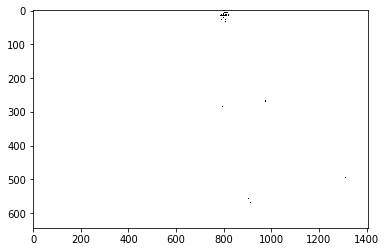

左邊 48
右邊 37


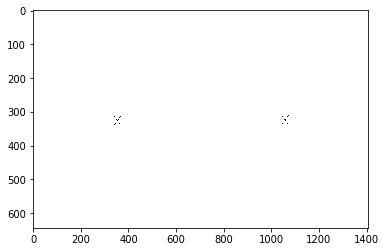

左邊 3307
右邊 40


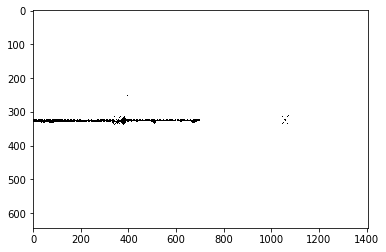

左邊 85
右邊 123


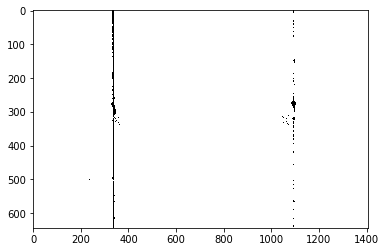

左邊 3344
右邊 191


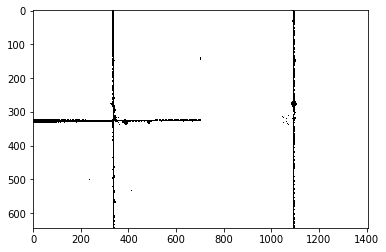

左邊 2456
右邊 4934


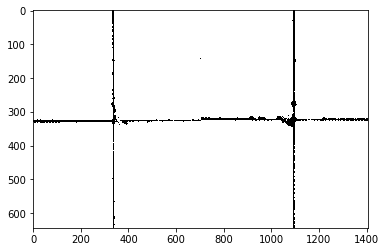

C:\Users\2102048\pythonCV\find_cut\ctemp\001.jpg
one 資料夾篩選結果 ['C:\\Users\\2102048\\pythonCV\\find_cut\\screen\\one\\Target_2021-06-22 103013.049739.jpg']
左邊 6340
右邊 12


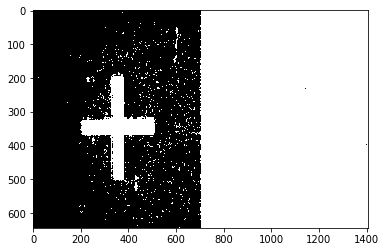

左邊 0
右邊 0


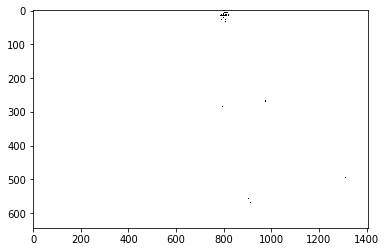

左邊 3723
右邊 46


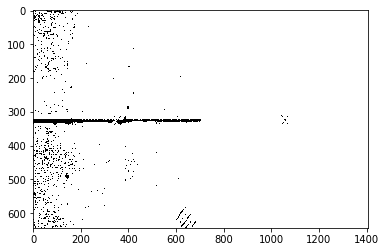

左邊 5500
右邊 11


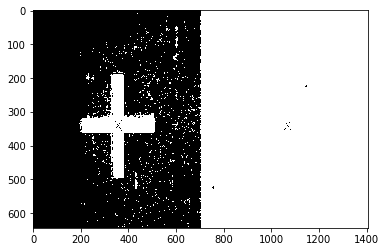

左邊 5357
右邊 120


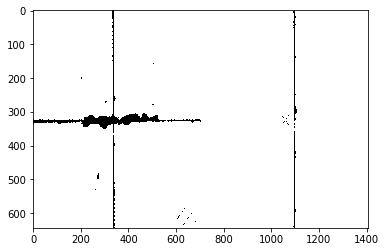

左邊 5148
右邊 4454


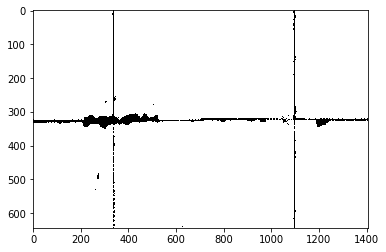

C:\Users\2102048\pythonCV\find_cut\ctemp\002.jpg
two 資料夾篩選結果 ['C:\\Users\\2102048\\pythonCV\\find_cut\\screen\\two\\Target_2021-06-22 103022.868737.jpg']
分割OK
Time: 18.341015815734863


In [4]:
#載入寫好的外部程式，(名稱不能有'_'，要放同一個資料夾下)
import CuttingLine as CL
import time

start_time=time.time()
btn_process=True
status="Start"
path='C:\\Users\\2102048\\pythonCV\\'
#path='C:\\Users\\Jacky\\Desktop\\'
#測試
CL.test_function()
#過濾
CL.use_find_CuttingLine(path+'find_cut\\screen\\',path+'find_cut\\ctemp')
time.sleep(1)
#分邊
CL.precutting(path+'find_cut\\ctemp\\',path+'find_cut\\cuttemp\\')
time.sleep(1)
# #計算
# global real_table
# real_table=CL.x_ray_cutting(path+'find_cut\\cuttemp\\',path+'find_cut\\cutresult\\')

end_time=time.time()
print('Time:',end_time-start_time)

## 重建資料夾(reset /one、/two)

In [162]:
#清空one、two 
import CuttingLine as CL
import time
path='C:\\Users\\2102048\\pythonCV\\'
#path='C:\\Users\\Jacky\\Desktop\\'
CL.resetfile(path+'find_cut\\ctemp')
CL.resetfile(path+'find_cut\\screen\\one')
time.sleep(2)
CL.resetfile(path+'find_cut\\screen\\two')

## 程式結束

In [ ]:
#下面測試不使用

### 原檔留底

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import datetime
start_time=time.time()
#cut frame，楨數
time_F =10 
value=0.6
#input_path   = './video/2021-05-20 08-56-30_7HAA.mp4'
#output_path  = './predict/'
#改成one、two分開

output_path= 'C:/Users/Jacky/Desktop/find_cut/20210609/'
Target= './template/'

#######################NEW##################################
output_path1='C:/Users/Jacky/Desktop/find_cut/screen/one/'
output_path2='C:/Users/Jacky/Desktop/find_cut/screen/two/'
#######################NEW##################################
# Read template folder

template_paths = []
image_paths=[]

if os.path.isdir(Target):

    for inp_file in os.listdir(Target):

        template_paths += [Target + inp_file]

else:

    template_paths += [Target]
#搜template_paths中符合條件的jpg在存入原本當中
template_paths = [inp_file for inp_file in template_paths if (inp_file[-4:] in ['.jpg', '.png', '.JPG','jpeg'])]

 


camera_port = 1
camera = cv2.VideoCapture(camera_port)
vc=cv2.VideoCapture(camera_port, cv2.CAP_DSHOW)

#調整解析度
vc.set(cv2.CAP_PROP_FRAME_WIDTH, 1600)
vc.set(cv2.CAP_PROP_FRAME_HEIGHT, 1200)
 

if vc.isOpened():#判斷是否開啟影片

    rval, video_frame = vc.read()

    print('Start....')

else:

    rval=False 

c=0

while rval:#擷取影像至結束

    rval,video_frame = vc.read()
    #多template路徑
#     temp_list=['./template/Target_1.jpg', './template/Target_2.jpg']
    if(c % time_F == 0): #每隔幾幀進行擷取, 
        temp_list=[] #inintal array
        #一個frame進來，比對所有template
        for temp in template_paths:
            ######new，使用多個temp####
            temp_list.append(temp)
            ##########################
            print("============{}=============".format(temp))
            image = video_frame

            img_rgb = image

            img_gray = cv2. cvtColor (img_rgb, cv2. COLOR_BGR2GRAY)
            
            
            #讀取temp特徵
            template = cv2. imread(temp,0)

            w, h = template. shape[ ::-1 ]

            print('w:{}\nh:{}'.format(w,h))

            res = cv2. matchTemplate(img_gray ,template,cv2.TM_CCOEFF_NORMED)

            threshold = value

            loc = np.where(res >=threshold)

            if np.asarray(loc[0]).size!=0: #if have object,plt image；loc tuple transfer to array
                ########讀取機台色階#######
                r,g,b=get_RGB(video_frame,300,300)
                print("R:{} G:{} B:{}".format(r,g,b))
                ########讀取機台色階#######
                
#                 for pt in zip (* loc [ ::- 1 ]):
#                     #(影像, 頂點座標, 對向頂點座標, 顏色, 線條寬度)
#                     #亮綠(7,249,151)，機台色(148,150,145)
#                     #cv2. rectangle (img_rgb, pt, ( pt [ 0 ] + w, pt [ 1 ] + h ) , (int(r),int(g),int(b)) , 2 )
#                     cv2. rectangle (img_rgb, pt, ( pt [ 0 ] + w, pt [ 1 ] + h ) , (7,249,151) , 2 )
                #設定截圖時左上角(x,y)座標
                #注意螢幕輸入大小，左上點(104,107)，右下點(1510,751)
                x=104 #截圖左上角 x座標

                y=107  #截圖左上角 y座標

                plt.imshow (img_rgb)

                plt.title('Raw_Image')
                
#               cv2.imwrite(output_path +'Screen_'+name+'.jpg', img_rgb)

                plt.show()

                #cut object from raw image

                #初始點上面X,Y已經設定好了
                #修改截圖出來的長寬H、W
                #注意螢幕輸入大小，右下點(1510,751)
                crop_img = img_rgb[y:751,x:1510]
                #crop_img = img_rgb[y:y+h,x:x+w]

                ss=datetime.datetime.now().strftime('%Y-%m-%d %H%M%S.%f')

                #cv2.imwrite(output_path +'Target_'+ss+'.jpg', crop_img)

                plt.title('Target_Image')
                #cv2.imwrite(output_path+'Target_'+ss+'.jpg',crop_img)
                #############new，不同template存不同資料夾################
                #判斷檔名跟當前迴圈的template
                if temp == temp_list[0]:
                    print("=================File One==================")
                    cv2.imwrite(output_path1+'Target_'+ss+'.jpg',crop_img)
                    
                elif temp == temp_list[1]:
                    print("=================File Two==================")
                    cv2.imwrite(output_path2+'Target_'+ss+'.jpg',crop_img)
                #############new，不同template存不同資料夾################
                plt.imshow(crop_img)

                plt.show()

            else:

                continue

    c=c+1       

end_time=time.time()

print('END')

print('Time:',end_time-start_time)
camera.release()

In [ ]:
#載入寫好的外部程式，(名稱不能有'_'，要放同一個資料夾下)
import CuttingLine as CL
#過濾
CL.use_find_CuttingLine('C:\\Users\\Jacky\\Desktop\\find_cut\\Screen\\','C:\\Users\\Jacky\\Desktop\\find_cut\\temp')
time.sleep(1)
#分邊
CL.precutting('C:\\Users\\Jacky\\Desktop\\find_cut\\temp\\','C:\\Users\\Jacky\\Desktop\\find_cut\\cut_temp\\')
time.sleep(1)
#計算
CL.x_ray_cutting('C:\\Users\\Jacky\\Desktop\\find_cut\\cut_temp\\','C:\\Users\\Jacky\\Desktop\\find_cut\\cut_result\\')

In [5]:
video_frame.shape

(1200, 1600, 3)

## 簡易版GUI

In [ ]:
#開啟舊檔test
from tkinter import *
from tkinter.filedialog import asksaveasfilename
from tkinter.filedialog import askopenfilename
#init
global btn_process,btn_end,status
btn_process,btn_end=False,False
status="Standby..."
real_table=
def newFile():
    text.delete("1.0",END)
    root.title("Untitled")
def openFile():
    global filename
    filename=askopenfilename()
    if filename=="":
        return
    with open(filename,"r")as fileObj:
        content=fileObj.read()
    text.delete("1.0",END)
    text.insert(END,content)
    root.title(filename)
def saveAsFile():
    global filename
    textContent=text .get("1.0",END)
    #開啟對話視窗
    filename=asksaveasfilename(defaultextension=".csv")
    if filename=="":
        return
    with open(filename,"w") as output:
        output.write(textContent)
        root.title(filename)
def control_status():
    if btn_process==True:
        status="Process..."
    elif btn_end==True:
        status="End"
    else:
        status="Standby..."
        
root=Tk()
root.title=("L3CMFG")
#設定視窗初始大小
root.geometry("500x400")
control_status() #判斷當前狀態
#建立最上層功能表
menubar=Menu(root)
#建立功能表內類別物件
filename='null'
filemenu=Menu(menubar,tearoff=False)
menubar.add_cascade(label="File",menu=filemenu)
#在file功能表內建立清單
filemenu.add_command(label="New File",command=newFile)
filemenu.add_command(label="Open File",command=openFile)
filemenu.add_command(label="Sava as...",command=saveAsFile)
filemenu.add_separator()
filemenu.add_command(label="Exit",command=root.destroy)
root.config(menu=menubar)

####設定開始按鈕#####
#執行影像處理程式
btn_process=Button(root,text="Process",activebackground='yellow',
                   width=15,command=x_ray_function)
#中止程式
btn_end=Button(root,text="End",
               activebackground='red',width=15,command=root.destroy)
btn_process.pack(side=TOP)
btn_end.pack(side=TOP)

#####顯示狀態####
label_status=Label(root,text=status,bg='lightyellow',
                   font="Times 15 bold",width=15)
#位置設定為top，填滿X軸，Y軸距離10，拖曳補滿視窗
label_status.pack(side=TOP,fill=X,pady=10,expand=True)

####顯示開啟的檔案#####

label_file=Label(root,text="檢視"+filename+"檔案",bg='lightyellow',
                 font="Times 10 bold",width=15)
label_file.pack(side=BOTTOM,fill=X,pady=5,expand=True)


#建立text
text=Text(root,undo=True)
text.pack(fill=BOTH,expand=True)
root.mainloop()